<a href="https://colab.research.google.com/github/cadl0/pytest/blob/main/Customers_clustering_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 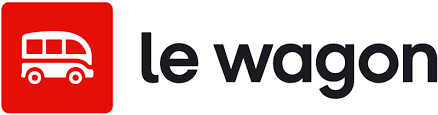

# Orders clustering

The purpose of the exercise is to extract different "typical profiles" of orders and consumers from Greenweez's turnover data. To achieve this, we will apply unsupervised learning algorithms to create order clusters.

## Orders clustering

a) Execute the cell below to load  the data into a `df` variable.

It will select 50k orders randomly (`ORDER BY rand()` in the SQL query).

In [1]:
from google.colab import auth
import pandas as pd

# get credentials
auth.authenticate_user()

query = '''
SELECT turnover_grocery, turnover_beauty, turnover_baby, turnover_home, turnover_fresh, promo_rate
FROM `data-analytics-bootcamp-363212.course33.gwz_orders_segmentation`
ORDER BY rand()
LIMIT 50000
'''
df = pd.read_gbq(query, project_id="data-analytics-bootcamp-363212")
df.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              0.00             0.00           7.89           0.00   
1              0.00            39.10         168.27           0.00   
2              3.24            19.35          89.89          11.86   
3            171.48             0.00           0.00           0.00   
4              0.00             0.00           0.00          41.39   

   turnover_fresh  promo_rate  
0             0.0    0.250000  
1             0.0    0.237182  
2             0.0    0.118989  
3             0.0    0.035274  
4             0.0         NaN

b) Which features do you see?

In [5]:
# your code here
#Poddemos obsevar las columnas de Turnover por grocery, beauty, baby, home y fresh, asi tambien la columna de promo_rate.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   turnover_grocery  50000 non-null  float64
 1   turnover_beauty   50000 non-null  float64
 2   turnover_baby     50000 non-null  float64
 3   turnover_home     50000 non-null  float64
 4   turnover_fresh    50000 non-null  float64
 5   promo_rate        33958 non-null  float64
dtypes: float64(6)
memory usage: 2.3 MB


Are there any null values?

In [9]:
# your code here
#Si, en la columna promo rate

df.isnull().sum()

turnover_grocery        0
turnover_beauty         0
turnover_baby           0
turnover_home           0
turnover_fresh          0
promo_rate          16042
dtype: int64

c) Replace null values (if any exist) with 0 using `fillna()`

In [10]:
# your code here
df = df.fillna(0)


In [11]:
# your code here
df.isnull().sum()

turnover_grocery    0
turnover_beauty     0
turnover_baby       0
turnover_home       0
turnover_fresh      0
promo_rate          0
dtype: int64

d) In a variable called `df_orders`, keep all the turnover columns from the original df. These features will help us cluster orders.

In [12]:
# your code here
df_orders = df[['turnover_grocery', 'turnover_beauty', 'turnover_baby', 'turnover_home', 'turnover_fresh']]
df_orders.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home  \
0              0.00             0.00           7.89           0.00   
1              0.00            39.10         168.27           0.00   
2              3.24            19.35          89.89          11.86   
3            171.48             0.00           0.00           0.00   
4              0.00             0.00           0.00          41.39   

   turnover_fresh  
0             0.0  
1             0.0  
2             0.0  
3             0.0  
4             0.0

e) Use plotly.express and a box chart to see if the distribution of turnover is different per category (i.e. feature).

In [13]:
# your code here
import plotly.express as px

fig = px.box(df_orders, points="all")
fig.show()

f) Most entries for the column 'turnover_fresh' do not differ from zero, it seems like people are not purchasing these products enough to conduct a meaningful analysis.

Delete the `turnover_fresh` column from `df_orders`.

In [14]:
# your code here
df_orders = df_orders.drop('turnover_fresh', axis=1)
df_orders.head()

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0              0.00             0.00           7.89           0.00
1              0.00            39.10         168.27           0.00
2              3.24            19.35          89.89          11.86
3            171.48             0.00           0.00           0.00
4              0.00             0.00           0.00          41.39

g) Train a first kmeans algorithm with two a-priori clusters. Remember that distance based models, such as k-means, are greatly effected by scale. Be sure to standardize your data appropriately.


In [30]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_orders_scaled = scaler.fit_transform(df_orders)

h) What is inertia for a clustering algorithm? What is inertia for this model?

In [32]:
# your code here
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(df_orders_scaled)

KMeans(n_clusters=2, n_init='auto', random_state=42)

i) How do we know if 2 clusters a priori was a good choice or not?
Which method could you use?

The elbow method will allow of to check inertias with differing numbers of starting clusters.

j) You will use elbow method.

You will need to loop over different values of  𝑘  (in range 1 to 10) and stores the inertia at each iteration in order to plot its evolution and select the best  𝑘.

Complete code below to do so.

In [33]:
inertias = []
n_k = range(1, 10)

# for each number of centroids
for k in n_k:

    # your code here
    kmeans = KMeans(n_clusters=k, random_state=42, n_init= 'auto')
    kmeans.fit(df_orders_scaled)
    inertias.append(kmeans.inertia_)

k) Use plotly.express to display a line chart of all inertias.

Which number of cluster you recommend and why?

In [34]:
# your code here
import plotly.express as px

fig = px.line(x=n_k, y=inertias)
fig.show()

<details>
    <summary><i>Solution</i></summary>

It seems like the largest decreases in inertia occur from 1 -> 2 centroids and then 2 -> 3 centroids. Accordingly, choosing 3 centroids seems like a sensible place to start.
</details>

l) Train a new model with 3 clusters a priori. Use parameter n_init=100 to select best model among 100 tries.

Use `predict()` method to predict in which cluster each row of `df_orders` belong to. We will store results in a `labels` variable.

In [35]:
# your code here
kmeans = KMeans(n_clusters=3, random_state=42, n_init=100)
kmeans.fit(df_orders_scaled)
labels = kmeans.predict(df_orders_scaled)

m) Use [countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html) function of seaborn library to count visualize number of samples per cluster. It is well distributed?

<Axes: ylabel='count'>

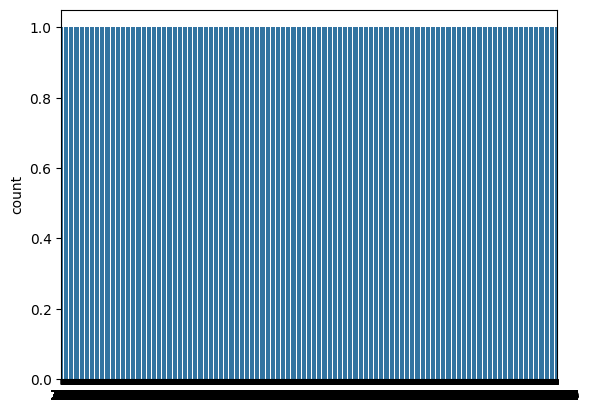

In [36]:
# your code here
import seaborn as sns
sns.countplot(labels)

One bigger cluster... but overall, orders are well distributed.

n) Each KMeans cluster has a center (centroid).

You can get the values of the center for each cluster using the `.cluster_centers_` attribute on your KMeans object.

Create a DataFrame with each cluster's centroid values and the names of the features that the model has been trained on.

In [37]:
# your code here
df_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_orders.columns)
df_centers

turnover_grocery  turnover_beauty  turnover_baby  turnover_home
0         -0.363113         0.191660      -0.357616       0.123386
1         -0.490711        -0.398736       1.754692      -0.233617
2          1.465624        -0.230414      -0.404724      -0.167395

o) What conclusions can you draw? What are the different order profiles that emerge?


En el grupo 0 hay una clara predileccion repartida ente el area de belleza y hogar, mientras el grupo 1 tiene el foco en el area de productos para bebes, finalmente el grupo 2 presenta el interes en comestibles/consumibles
Asi tambien, el area con menor interes en general es el de bebes, sin embargo tambien es la que tiene un foco mas agudo en el grupo 1, siendo un area muy de nicho al contrastarlo con el interes en las otras areas

<details>
    <summary><i>Solution</i></summary>

Remember that the values in each column are the relative coordinates for each centroid across the features. The greater the magnitude of a feature for a cluster, the more important that feature is to that cluster.

In the example above we can see 3 types of orders : 1 with mostly groceries, 1 with baby products and 1 that is more evenly distributed mainly mixing beauty and home products.
</details>

p) Add to `df` a new column label containing labels of each sample.

In [38]:
# your code here
df['label'] = labels

q) What does this instruction do? What can you say?

In [39]:
df[df["promo_rate"] > 0].groupby("label").size() / df.groupby("label").size()

label
0    0.647193
1    0.654741
2    0.792351
dtype: float64

Los compradores de consumibles son mas reiterativos en su uso y busqueda de promociones, por el contrario, los enfocados en productos de bebes, son los siguientes, lo que podria indicarnos que priorizan la calidad por encima del precio en algunos productos, se requiere un analisis mas profundo para revisar que productos son los que se priorizan como no negociables para los clientes de este segemnto.
Finalmente, los consumidores de belleza y hogar son los que menos promociones aplican, nuevamente es probable que dada la naturaleza de productos de belleza (probablemente dermocosmetica), estos clientes prioricen calidad y marcas, sin embargo, tendriamos que hacer un contraste con el area de hogar, asi mismo validar que areas son las que mas promociones ofertan en cada cohorte analizado.

Where the promotion rate is greater than zero, we can see that the cluster we have associated with greater grocery turnover uses promotion codes more than others.
